### Student Information
Name:黃啟庭

Student ID:B1143036

GitHub ID:Baka8787

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

In [21]:
### Begin Assignment Here
!pip install PAMI
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

/usr/bin/python3
3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
R_df = pd.read_csv('/content/newdataset/Reddit-stock-sentiment.csv')
print(len(R_df.text))
print(len(R_df.upvotes))

847
847


In [23]:
print("資料集欄位名稱：", R_df.columns.tolist())
print(R_df.head())

資料集欄位名稱： ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          Btankersly66   
3                              Who knows more? $VMAR             emiljenfn   
4  The Trump administration is begging Xi Jinpi

In [24]:
for i in range(3):
    print(f"example {i+1}")
    print(R_df["text"][i])

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [25]:
def format_reddit_labels(t):
    if t == 1:
        return 'Positive'
    elif t == -1:
        return 'Negative'
    elif t == 0:
        return 'Neutral'
    else:
        return 'Unknown'


X_new = R_df[['title']].copy()
X_new['text'] = R_df['text']
X_new['datetime'] = pd.to_datetime(R_df['datetime'])
X_new['entities'] = R_df['entities']
X_new['category'] = R_df['label']
X_new['category_name'] = X_new.category.apply(format_reddit_labels)

In [26]:
print(X_new.head())
print(X_new['category_name'].value_counts())
X_new[X_new["category"] != 1 ][-500:-200:10][:10]

                                               title  \
0    Retardation is on the menu boys! WSB is so back   
1  Retail giant TARGET has now declined for 10 co...   
2  How do you feel about a sitting president maki...   
3                              Who knows more? $VMAR   
4  The Trump administration is begging Xi Jinping...   

                                                text            datetime  \
0                                   Calls on retards 2025-04-11 17:29:56   
1  Stunt as in like why did they even make a big ... 2025-04-12 01:12:19   
2                  Seeing lots of red in the ticker. 2025-04-10 15:09:41   
3  Vision Marine Technologies Inc. is rewriting t... 2023-08-30 17:12:55   
4                           He didn’t say thank you. 2025-04-11 14:48:05   

                                            entities  category category_name  
0                                                 []      -1.0      Negative  
1              ['Stunt', 'company', 'deal', 'pla

,title,text,datetime,entities,category,category_name
275,Retail giant TARGET has now declined for 10 co...,"Speak for yourself, my wife is being harder on...",2025-04-12 02:27:29,"['BBQ', 'potato', 'anime', 'wife', 'level', 'S...",0.0,Neutral
286,r/Stocks Daily Discussion & Fundamentals Frida...,All of Xi’s cadres have worked for decades in ...,2025-04-11 15:01:49,"['cabinet', 'wilderness', 'factory', 'Xi', 'Tr...",-1.0,Negative
298,"Trump is surrounded by a bunch of idiots, he s...",His Financial policy is based off a fictional ...,2025-04-11 13:38:58,"['policy', 'book', 'Russia', 'advisor', 'Thiel...",-1.0,Negative
308,Anyone following $MEGA.CN??,MegaWatt's making moves! Bagging Labrador Mine...,2024-05-08 16:28:22,"['Bagging', 'Mineral', 'expansion', 'resource'...",0.0,Neutral
318,Is the market in complete denial right now?,If costs increase wouldn’t it just show higher...,2025-04-11 15:21:44,"['t', '’', 'profit', 'number']",0.0,Neutral
329,Data Shows US Allies—Not China—Dumping Treasuries,I don’t think they will feel it for a few week...,2025-04-11 12:33:47,"['news', 't', 'prez', 'face']",-1.0,Negative
344,BREAKING: China raises tariffs on U.S. goods t...,Trump is delusional and so as his supporters. ...,2025-04-11 15:16:54,['Trump'],-1.0,Negative
355,🚨China responds to Trump’s 145% tariff with an...,"I agree, but you cannot just quickly change ou...",2025-04-11 13:19:35,"['manufacturing', 'U.S.', 'way', 'today', 'hea...",0.0,Neutral
365,KAVL on the climb with a ton of potential,Has anyone seen what the shorts did to KAVL!! ...,2021-10-04 15:59:48,"['KAVL', 'GME', 'anyone', 'Has', 'AMC']",-1.0,Negative
377,$ U.S. dollar value (crashing),Oooooffff 99.45 right now,2025-04-11 09:34:09,[],0.0,Neutral


In [27]:
import helpers.data_mining_helpers as dmh
X_new.isnull()
X_new.isnull().apply(lambda x: dmh.check_missing_values(x))

,title,text,datetime,entities,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0


In [28]:
total_duplicates_all_cols = X_new.duplicated().sum()
print(f"所有欄位都重複的列數：{total_duplicates_all_cols}")

total_duplicates_text_only = X_new.duplicated(subset=['text']).sum()
print(f"'text' 欄位重複的列數：{total_duplicates_text_only}")

所有欄位都重複的列數：0
'text' 欄位重複的列數：23


In [29]:
print(len(X_new))
dummy_duplicate_dict = [{
    'text': 'dummy record for testing', # 更改文本以避免與真實資料重複
    'category': 0,
    'category_name': "Neutral",
    'title': 'Test Title',
    'datetime': pd.NaT, # NaT for NaT-time
    'entities': np.nan
},
{
    'text': 'dummy record for testing',
    'category': 0,
    'category_name': "Neutral",
    'title': 'Test Title',
    'datetime': pd.NaT,
    'entities': np.nan
}]

847


In [30]:
X_new = pd.concat([X_new, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
print(len(X_new))
total_duplicates_after_concat = X_new.duplicated().sum()
print(f"新增兩筆重複資料後，總重複列數：{total_duplicates_after_concat}")

849
新增兩筆重複資料後，總重複列數：1


In [31]:
initial_rows = len(X_new)

X_new.drop_duplicates(keep=False, inplace=True)

final_rows = len(X_new)
rows_removed = initial_rows - final_rows

print(f"原始列數：{initial_rows}")
print(f"移除後剩餘列數：{final_rows}")
print(f"總共移除了 {rows_removed} 列（包含模擬的重複資料）")

原始列數：849
移除後剩餘列數：847
總共移除了 2 列（包含模擬的重複資料）


In [32]:
X_sample = X_new.sample(n=400, random_state=42)
X_counts = X_new.category_name.value_counts().rename('Full Data')
X_sample_counts = X_sample.category_name.value_counts().rename('Sample (n=400)')

               Full Data  Sample (n=400)
category_name                           
Neutral              423             202
Negative             315             139
Positive             109              59


<Axes: title={'center': 'Category Distribution: Full Data vs. Sample'}, xlabel='category_name'>

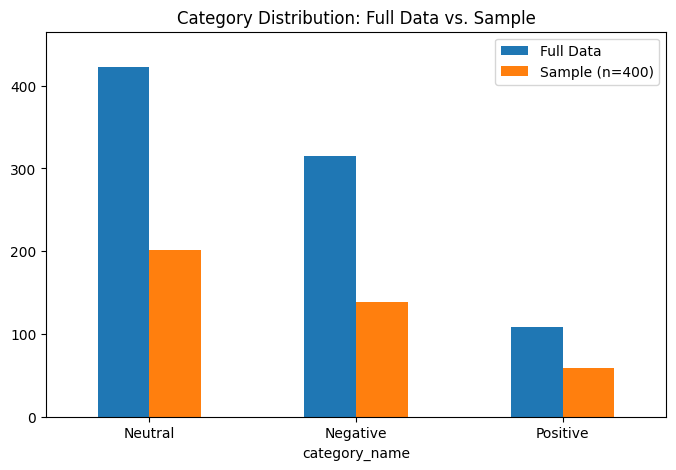

In [33]:
comparison_df = pd.concat([X_counts, X_sample_counts], axis=1).fillna(0)
comparison_df = comparison_df.astype(int)
print(comparison_df)
comparison_df.plot(
    kind='bar',
    title='Category Distribution: Full Data vs. Sample',
    ylim=[0, comparison_df.max().max() * 1.1],
    rot=0,
    fontsize=10,
    figsize=(8, 5)
)

In [34]:
import nltk

nltk.download("punkt", quiet=True)
X_new['text'] = X_new['text'].fillna('')

In [35]:
def tokenize_text(text):
    if isinstance(text, str):
        return nltk.word_tokenize(text.lower())
    return []

nltk.download('punkt_tab', quiet=True) # Download the missing resource
X_new['unigrams'] = X_new['text'].apply(lambda x: tokenize_text(x))
print(X_new[0:4]['unigrams'])
print(X_new.iloc[0]['unigrams'])

0                                 [calls, on, retards]
1    [stunt, as, in, like, why, did, they, even, ma...
2          [seeing, lots, of, red, in, the, ticker, .]
3    [vision, marine, technologies, inc., is, rewri...
Name: unigrams, dtype: object
['calls', 'on', 'retards']


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

X_to_vectorize = X_new['text'].astype(str)

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X_to_vectorize)

print(X_counts[0])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (1, 4346)>
  Coords	Values
  (0, 692)	1
  (0, 2706)	1
  (0, 3248)	1


In [37]:
vocab_size = len(count_vect.get_feature_names_out())
index_to_check = min(14887, vocab_size - 1)
print(f"idx: {index_to_check}")
if vocab_size > 0:
    example_feature = count_vect.get_feature_names_out()[index_to_check]
    print(f"{index_to_check} : '{example_feature}'")
else:
    print("不存在")


analyze = count_vect.build_analyzer()

test_phrase = "I am craving for a hawaiian pizza right now"
print(f"{analyze(test_phrase)}")

first_text = X_new['text'].iloc[0]
print(analyze(first_text)[:10])

idx: 4345
4345 : 'zsil'
['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']
['calls', 'on', 'retards']


In [38]:
print(X_counts.shape)
print(count_vect.get_feature_names_out()[0:10])
print(X_counts[0:5, 0:100].toarray())

(847, 4346)
['00' '000' '01378' '02' '027' '03' '06' '08' '10' '100']
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 

In [39]:
feature_names = count_vect.get_feature_names_out()[:100]
nonzero_column_indices = X_counts[3].toarray().nonzero()[0]
print(count_vect.get_feature_names_out()[nonzero_column_indices[1]])

00


[457, 342, 280, 275, 843]


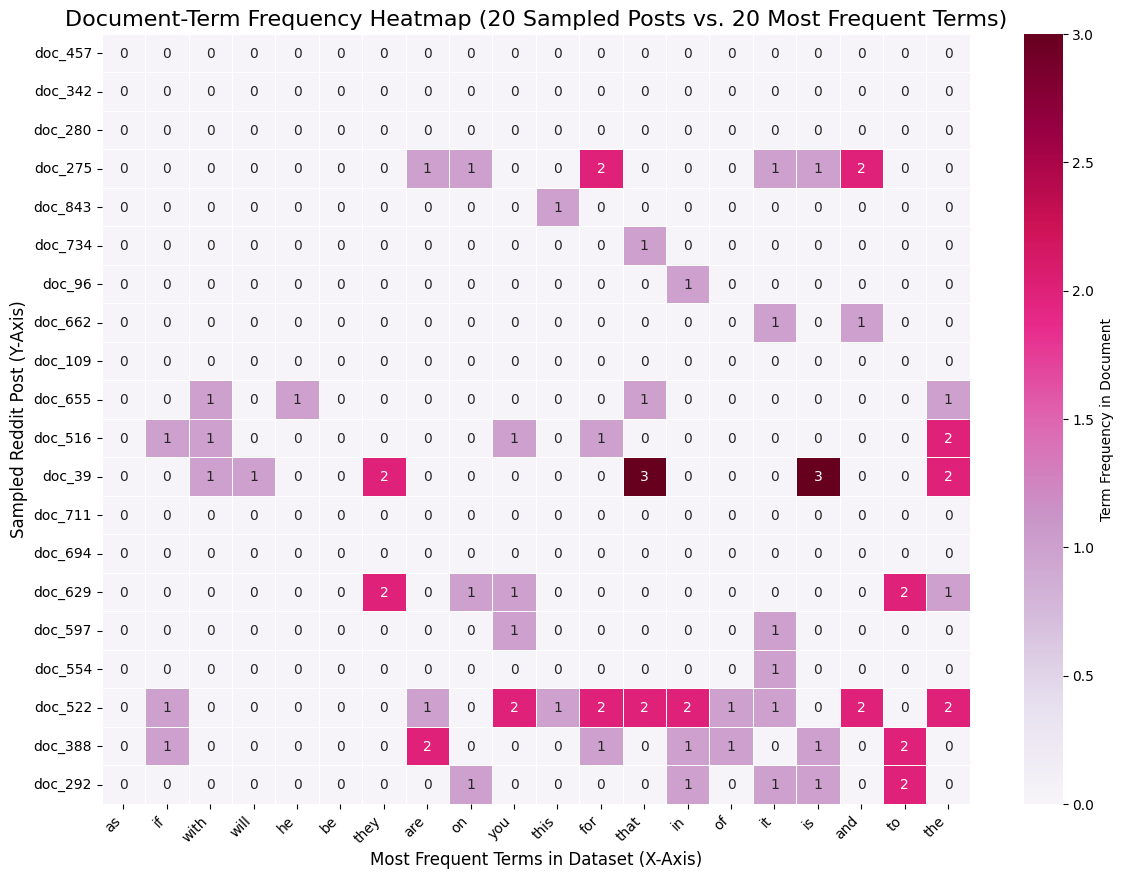

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import issparse

X_sample_idx = X_new.sample(n=20, random_state=42).index
sample_indices = [X_new.index.get_loc(i) for i in X_sample_idx]
print(sample_indices[:5])
term_frequencies = X_counts.sum(axis=0).A1
top_20_indices = np.argsort(term_frequencies)[-20:]
plot_x = count_vect.get_feature_names_out()[top_20_indices]
plot_y = ["doc_"+ str(i) for i in X_sample_idx]
plot_z = X_counts[np.ix_(sample_indices, top_20_indices)].toarray() # Changed .A to .toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)


plt.figure(figsize=(14, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",          # 設定顏色映射
                 vmin=0,               # 設定顏色範圍最小值
                 vmax=plot_z.max(),    # 設定顏色範圍最大值
                 annot=True,           # 在單元格上顯示數值
                 fmt='d',              # 確保數值顯示為整數
                 linewidths=.5,        # 增加邊框以區分單元格
                 cbar_kws={'label': 'Term Frequency in Document'}) # 顏色條標籤

ax.set_title('Document-Term Frequency Heatmap (20 Sampled Posts vs. 20 Most Frequent Terms)', fontsize=16)
ax.set_xlabel('Most Frequent Terms in Dataset (X-Axis)', fontsize=12)
ax.set_ylabel('Sampled Reddit Post (Y-Axis)', fontsize=12)
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.show()

In [42]:
term_frequencies = X_counts.sum(axis=0).A1
first_term_frequency = term_frequencies[0]
first_term_name = count_vect.get_feature_names_out()[0]

/tmp/ipython-input-1581952791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Term', y='Frequency', data=df_plot_sorted, palette="viridis")


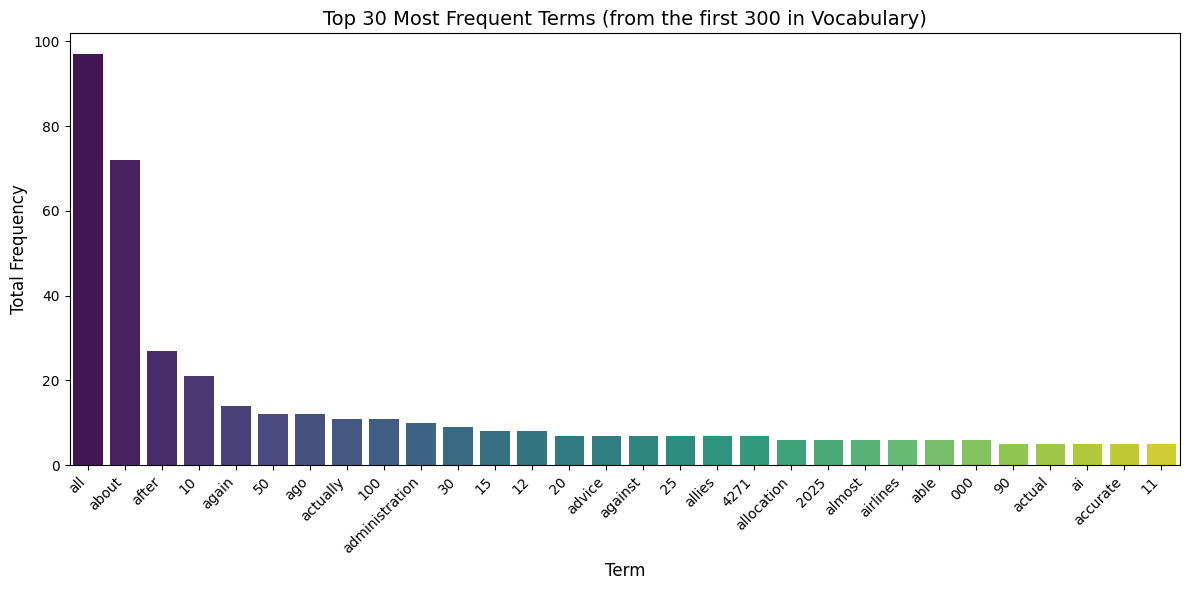

In [43]:
N_terms = 300
df_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:N_terms],
    'Frequency': term_frequencies[:N_terms]
})

df_plot_sorted = df_plot.sort_values(by='Frequency', ascending=False).head(30)

plt.figure(figsize=(12, 6))
sns.barplot(x='Term', y='Frequency', data=df_plot_sorted, palette="viridis")
plt.title(f'Top 30 Most Frequent Terms (from the first {N_terms} in Vocabulary)', fontsize=14)
plt.xlabel('Term', fontsize=12)
plt.ylabel('Total Frequency', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('top_term_frequencies_bar_chart.png')

/tmp/ipython-input-3166559369.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.barplot(x='Term',
/tmp/ipython-input-3166559369.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(df_display['Term'], rotation=90)


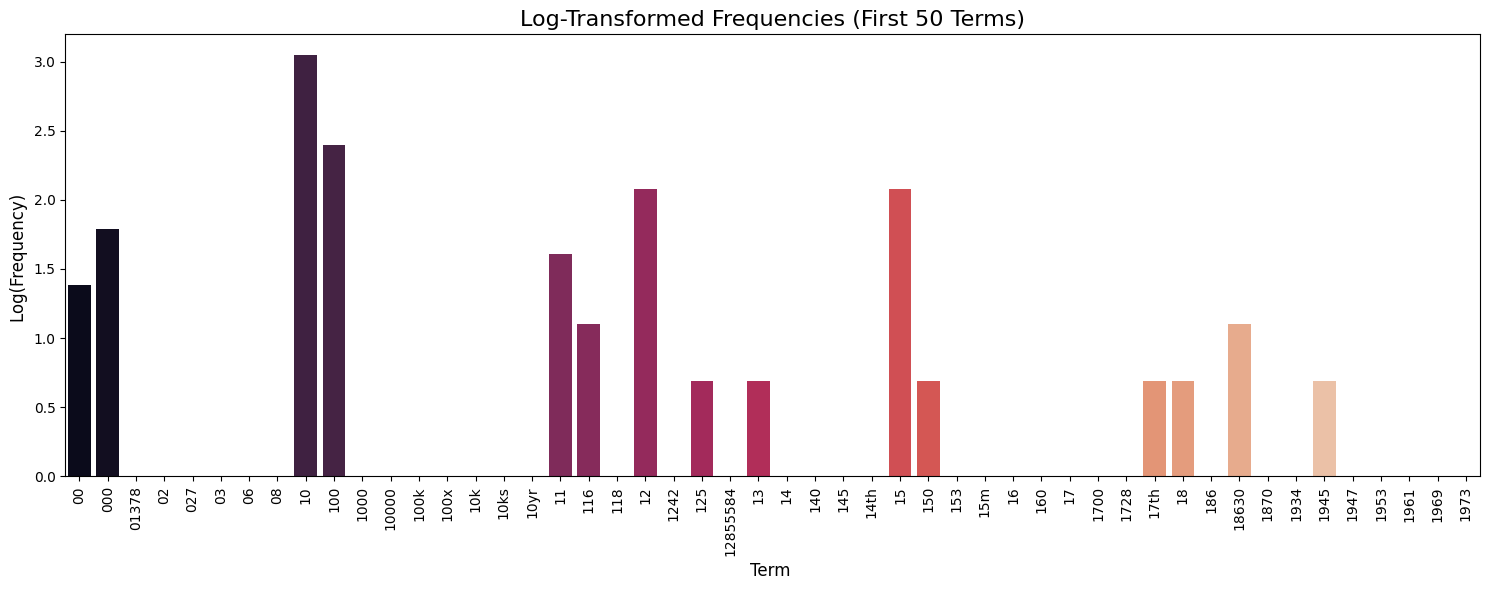

In [44]:
term_frequencies_log = np.log(term_frequencies)

N_terms = 300
df_log_plot = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:N_terms],
    'Log_Frequency': term_frequencies_log[:N_terms]
})

N_display = 50
df_display = df_log_plot.head(N_display)

plt.figure(figsize=(15, 6))
g = sns.barplot(x='Term',
                y='Log_Frequency',
                data=df_display,
                palette="rocket")

g.set_xticklabels(df_display['Term'], rotation=90)
g.set_title(f'Log-Transformed Frequencies (First {N_display} Terms)', fontsize=16)
g.set_xlabel('Term ', fontsize=12)
g.set_ylabel('Log(Frequency) ', fontsize=12)
plt.tight_layout()
plt.savefig('log_term_frequencies_bar_chart.png')

## Part3
觀察在不同星期幾和一天中的時段，正面/負面/中性貼文的數量分佈

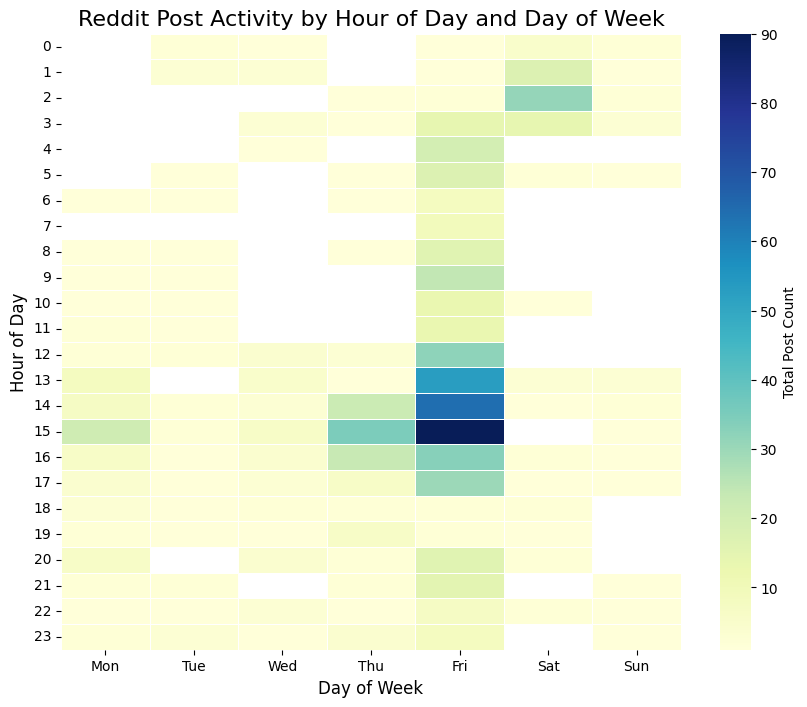

In [45]:
df_temp = X_new.copy()
df_temp['DayOfWeek'] = df_temp['datetime'].dt.dayofweek
df_temp['Hour'] = df_temp['datetime'].dt.hour

sentiment_pivot = df_temp.pivot_table(
    index='Hour',
    columns='DayOfWeek',
    values='category',
    aggfunc='count'
)

day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sentiment_pivot.columns = day_names[:len(sentiment_pivot.columns)]

plt.figure(figsize=(10, 8))
sns.heatmap(
    sentiment_pivot,
    cmap="YlGnBu",
    annot=False,
    fmt="d",
    linewidths=.5,
    cbar_kws={'label': 'Total Post Count'}
)
plt.title('Reddit Post Activity by Hour of Day and Day of Week', fontsize=16)
plt.ylabel('Hour of Day', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.yticks(rotation=0)
plt.show()

# Phase 2

In [46]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# ----------------------------------------------------
# 🌟 使用您的主數據 DataFrame X_new
# ----------------------------------------------------
data_df = X_new
GROUPING_COLUMN = 'category_name' # 根據 Phase 1 輸出，分組欄位是 category_name

print(f"分組欄位 {GROUPING_COLUMN} 的分佈:")
print(data_df[GROUPING_COLUMN].value_counts())

categories = data_df[GROUPING_COLUMN].unique()
category_dfs = {}

for category in categories:
    # 根據 category_name 欄位過濾並儲存
    category_dfs[category] = data_df[data_df[GROUPING_COLUMN] == category].copy()

# ----------------------------------------------------
# 函數：建立 TDM
# ----------------------------------------------------
def create_term_document_df(df_input):
    """將 DataFrame 的 'text' 欄位轉換為文件-術語頻率矩陣 (TDM)。

    由於 Phase 1 確保了 'text' 欄位是字串，這裡可以直接使用。
    """
    # 使用 token_pattern=r'\b\w\w+\b' 來忽略單一字符的 token
    count_vect = CountVectorizer(token_pattern=r'\b\w\w+\b')

    if df_input.empty or 'text' not in df_input.columns:
        return pd.DataFrame()

    # 這裡直接使用 'text' 欄位，它在 Phase 1 已被清理且確認為字串
    text_data = df_input['text']

    X_counts = count_vect.fit_transform(text_data)
    words = count_vect.get_feature_names_out()

    # 使用原始索引
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words, index=df_input.index)
    return term_document_df

# ----------------------------------------------------
# 執行 TDM 建立
# ----------------------------------------------------
filt_term_document_dfs = {}
print("\n--- 正在為每個情緒類別建立 TDM ---")
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

# ----------------------------------------------------
# 函數：篩選 Top/Bottom 詞彙 (用於準備頻繁模式挖掘)
# ----------------------------------------------------
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    """根據詞彙總和移除 Top X% (最常見) 和 Bottom Y% (最罕見) 的詞彙。"""
    if term_document_df.empty:
        return pd.DataFrame()

    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values(ascending=True)

    total_words = len(sorted_words)

    # 計算要移除的數量 (確保至少移除 1 個，如果總詞彙數允許)
    top_n = max(1, int(top_percent * total_words)) if total_words > 0 else 0
    bottom_n = max(1, int(bottom_percent * total_words)) if total_words > 0 else 0

    if total_words < top_n + bottom_n:
        print(f"警告：詞彙總數 ({total_words}) 過少，無法移除 {top_n + bottom_n} 個詞彙。跳過篩選。")
        return term_document_df

    # 取得要移除的詞彙列表 (索引)
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index

    # 輸出移除的詞彙清單
    print(f'總詞彙數: {total_words}')
    print(f'移除 Bottom {bottom_percent*100:.0f}% ({bottom_n} 詞彙，最罕見，頻率大多為 1):')
    print(sorted_words.head(bottom_n).to_string())
    print(f'移除 Top {top_percent*100:.0f}% ({top_n} 詞彙，最常見，常為噪音或停用詞):')
    print(sorted_words.tail(top_n).to_string())

    return term_document_df.drop(columns=words_to_remove)

# ----------------------------------------------------
# 執行 Top/Bottom 篩選
# ----------------------------------------------------
term_document_dfs = {}

for category in categories:
    print(f'\n--- 針對 情緒類別: {category} 進行詞彙篩選 (移除 Top 5% / Bottom 1%) ---')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(
        filt_term_document_dfs[category],
        top_percent=0.05,
        bottom_percent=0.01
    )

# 最終結果展示
if len(categories) > 0:
    example_category = categories[0]
    print(f"\n==================================================")
    print(f"Final Filtered TDM (用於模式挖掘) for Category {example_category}:")
    print(f"篩選後詞彙數: {term_document_dfs[example_category].shape[1]}")
    display(term_document_dfs[example_category].head())

分組欄位 category_name 的分佈:
category_name
Neutral     423
Negative    315
Positive    109
Name: count, dtype: int64

--- 正在為每個情緒類別建立 TDM ---

--- 針對 情緒類別: Negative 進行詞彙篩選 (移除 Top 5% / Bottom 1%) ---
總詞彙數: 2192
移除 Bottom 1% (21 詞彙，最罕見，頻率大多為 1):
sputter          1
justice          1
journalism       1
started          1
start            1
standstill       1
standing         1
stand            1
stances          1
stamp            1
stage            1
squad            1
ked              1
spontaneously    1
spiro            1
jobs             1
jingping         1
jfk              1
jerome           1
japanese         1
jan              1
移除 Top 5% (109 詞彙，最常見，常為噪音或停用詞):
these         11
dollar        11
everyone      12
could         12
literally     12
me            12
your          12
most          12
much          12
shit          12
never         12
xi            13
wants         13
go            13
point         13
american      13
back          13
good          14
world         14
becau

,000,02,03,10,100,1000,10000,11,12,13,...,yeah,year,years,yet,yields,yippee,yo,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from PAMI.extras.convert.DF2DB import DF2DB

# Loop through the dictionary of term-document DataFrames (term_document_dfs)
for category, tdm_df in term_document_dfs.items():
    category_safe = category.replace(' ', '_').replace('.', '_')

    obj = DF2DB(tdm_df)
    file_name = f'td_freq_db_{category_safe}.csv'
    obj.convert2TransactionalDatabase(file_name, '>=', 1)
    print(f"Created transactional database: {file_name}")

Created transactional database: td_freq_db_Negative.csv
Created transactional database: td_freq_db_Neutral.csv
Created transactional database: td_freq_db_Positive.csv



--- 數據庫統計分析: td_freq_db_Positive.csv ---
Database size (total no of transactions) : 108
Number of items : 1103
Minimum Transaction Size : 1
Average Transaction Size : 14.287037037037036
Maximum Transaction Size : 92
Standard Deviation Transaction Size : 16.775782217191193
Variance in Transaction Sizes : 284.05702665282104
Sparsity : 0.9870471105738559


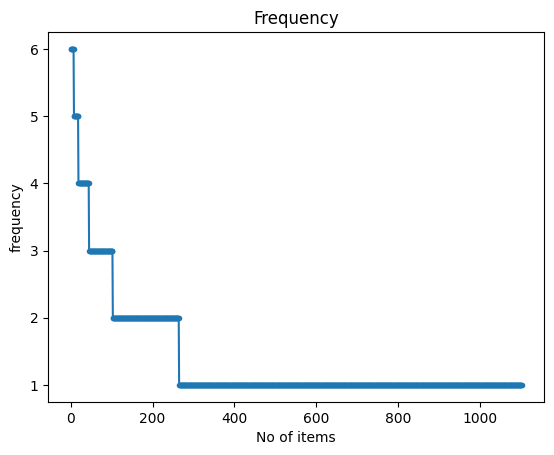

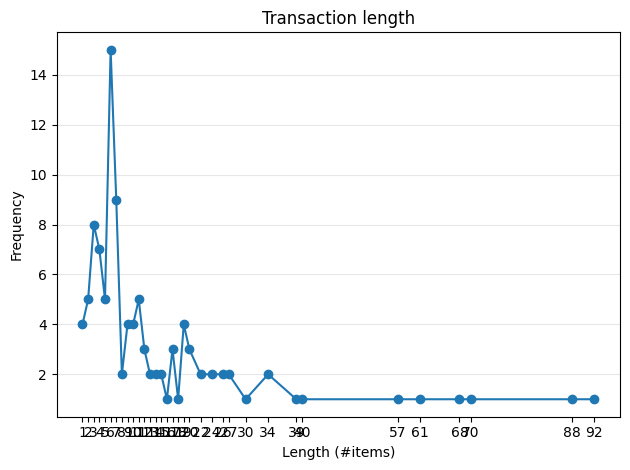


--- 數據庫統計分析: td_freq_db_Negative.csv ---
Database size (total no of transactions) : 315
Number of items : 2062
Minimum Transaction Size : 1
Average Transaction Size : 11.82857142857143
Maximum Transaction Size : 137
Standard Deviation Transaction Size : 13.233284497588054
Variance in Transaction Sizes : 175.67752502274794
Sparsity : 0.9942635444090342


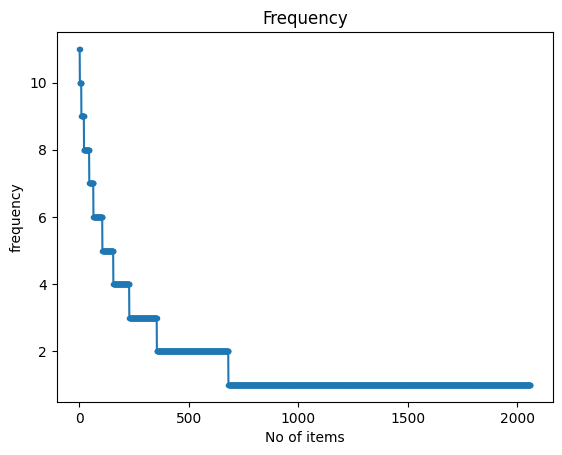

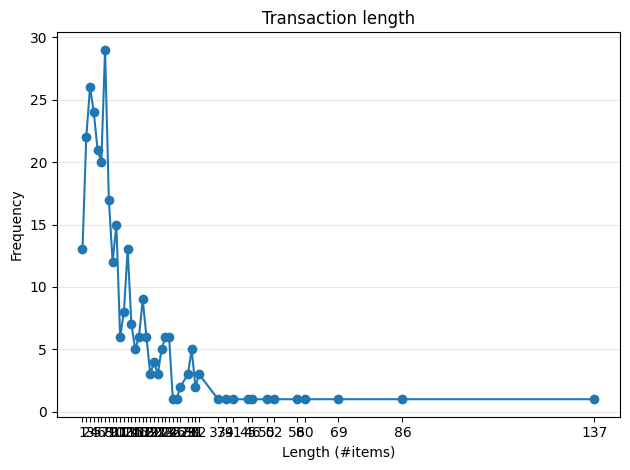

In [49]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

# 分析 Positive 類別
file_name_positive = 'td_freq_db_Positive.csv'
obj_pos = tds.TransactionalDatabase(file_name_positive)
print(f"\n--- 數據庫統計分析: {file_name_positive} ---")
obj_pos.run()
obj_pos.printStats()
obj_pos.plotGraphs()

# 分析 Negative 類別
file_name_negative = 'td_freq_db_Negative.csv'
obj_neg = tds.TransactionalDatabase(file_name_negative)
print(f"\n--- 數據庫統計分析: {file_name_negative} ---")
obj_neg.run()
obj_neg.printStats()
obj_neg.plotGraphs()

In [50]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9 # 最小支持度

# 定義情緒類別及其對應的檔案名稱
category_files = {
    'Positive': 'td_freq_db_Positive.csv',
    'Negative': 'td_freq_db_Negative.csv',
    'Neutral': 'td_freq_db_Neutral.csv',
    'Unknown': 'td_freq_db_Unknown.csv',
}

frequent_patterns_dfs = {}
for category, file_path in category_files.items():
    print(f"\n--- 運行 FPGrowth for 類別: {category} (minSup={minSup}) ---")

    obj = alg.FPGrowth(iFile=file_path, minSup=minSup)
    obj.mine()

    df = obj.getPatternsAsDataFrame()
    # 增加 Source_Category 欄位，方便後續篩選
    df['Source_Category'] = category
    frequent_patterns_dfs[category] = df

    print(f'總模式數 for {category}: {len(df)}')
    print(f'運行時間: {obj.getRuntime():.4f} 秒')

    save_name = f'freq_patterns_{category.lower()}_minSup{minSup}.txt'
    obj.save(save_name)
    display(df.head())


--- 運行 FPGrowth for 類別: Positive (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Positive: 0
運行時間: 0.0012 秒


,Patterns,Support,Source_Category



--- 運行 FPGrowth for 類別: Negative (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Negative: 21
運行時間: 0.0046 秒


,Patterns,Support,Source_Category
0,end,9,Negative
1,right,9,Negative
2,off,9,Negative
3,seems,9,Negative
4,want,9,Negative



--- 運行 FPGrowth for 類別: Neutral (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Neutral: 19
運行時間: 0.0053 秒


,Patterns,Support,Source_Category
0,looking,9,Neutral
1,cash,9,Neutral
2,said,9,Neutral
3,got,9,Neutral
4,every,9,Neutral



--- 運行 FPGrowth for 類別: Unknown (minSup=9) ---
File Not Found


NameError: name 'quit' is not defined

In [52]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9 # 最小支持度

# 定義情緒類別及其對應的檔案名稱
category_files = {
    'Positive': 'td_freq_db_Positive.csv',
    'Negative': 'td_freq_db_Negative.csv',
    'Neutral': 'td_freq_db_Neutral.csv',
}

frequent_patterns_dfs = {}
for category, file_path in category_files.items():
    print(f"\n--- 運行 FPGrowth for 類別: {category} (minSup={minSup}) ---")

    obj = alg.FPGrowth(iFile=file_path, minSup=minSup)
    obj.mine()

    df = obj.getPatternsAsDataFrame()
    # 增加 Source_Category 欄位，方便後續篩選
    df['Source_Category'] = category
    frequent_patterns_dfs[category] = df

    print(f'總模式數 for {category}: {len(df)}')
    print(f'運行時間: {obj.getRuntime():.4f} 秒')

    save_name = f'freq_patterns_{category.lower()}_minSup{minSup}.txt'
    obj.save(save_name)
    display(df.head())


--- 運行 FPGrowth for 類別: Positive (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Positive: 0
運行時間: 0.0016 秒


,Patterns,Support,Source_Category



--- 運行 FPGrowth for 類別: Negative (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Negative: 21
運行時間: 0.0039 秒


,Patterns,Support,Source_Category
0,end,9,Negative
1,right,9,Negative
2,off,9,Negative
3,seems,9,Negative
4,want,9,Negative



--- 運行 FPGrowth for 類別: Neutral (minSup=9) ---
Frequent patterns were generated successfully using frequentPatternGrowth algorithm
總模式數 for Neutral: 19
運行時間: 0.0066 秒


,Patterns,Support,Source_Category
0,looking,9,Neutral
1,cash,9,Neutral
2,said,9,Neutral
3,got,9,Neutral
4,every,9,Neutral


In [53]:
# Group together all of the dataframes related to our found patterns
dfs = list(frequent_patterns_dfs.values())

# 1. 統計每個模式出現的類別數量
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

# 2. 篩選出只出現過 1 次的獨特模式
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# 3. 計算捨棄的模式總數
total_patterns_count = sum(len(df) for df in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# 4. 過濾每個類別的模式，只保留獨特模式
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)].copy()
    filtered_dfs.append(filtered_df)

# 5. 合併所有獨特模式到一個 DataFrame
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# 6. 按支持度排序
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

print("\n--- Final Discriminative Pattern List ---")
display(final_pattern_df)

print(f"\n總共找到的模式數: {total_patterns_count}")
print(f"被捨棄的模式數 (跨類別共享): {discarded_patterns_count}")
print(f"剩餘的獨特 (Discriminative) 模式數: {len(final_pattern_df)}")


--- Final Discriminative Pattern List ---


,Patterns,Support,Source_Category
19,after,11,Negative
18,already,11,Negative
11,things,10,Negative
36,most,10,Neutral
35,let,10,Neutral
17,again,10,Negative
16,bad,10,Negative
15,should,10,Negative
14,sure,10,Negative
13,day,10,Negative



總共找到的模式數: 40
被捨棄的模式數 (跨類別共享): 2
剩餘的獨特 (Discriminative) 模式數: 38


In [57]:
from sklearn.feature_extraction.text import CountVectorizer

# 1. 將 'text' 欄位轉換為 Term-Document Matrix (TDM)
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X_new['text'])
terms = count_vect.get_feature_names_out()

# 2. Tokenize the sentences into sets of unique words for quick pattern checking
X_new['tokenized_text'] = X_new['text'].str.split().apply(set)

# 3. 初始化 Pattern Matrix
pattern_matrix = pd.DataFrame(0, index=X_new.index, columns=final_pattern_df['Patterns'])

# 4. 迭代每個獨特模式，檢查它是否在每篇文檔中出現
print("\n--- 正在創建 Pattern Feature Matrix ---")
for pattern in final_pattern_df['Patterns']:
    # 將模式字串分解為單詞集合
    pattern_words = set(pattern.split())

    # 1 if pattern_words is a subset of the document's tokens, else 0
    pattern_matrix[pattern] = X_new['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# 5. 將 TDM 轉換為 DataFrame
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X_new.index)

# 6. 將原始 TDM 和 Pattern Matrix 串聯起來，完成特徵擴充
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print(f"原始 TDM 特徵數: {tdm_df.shape[1]}")
print(f"新增 Pattern 特徵數: {pattern_matrix.shape[1]}")
print(f"擴充後 DataFrame 大小: {augmented_df.shape}")
display(augmented_df.head())


--- 正在創建 Pattern Feature Matrix ---
原始 TDM 特徵數: 4346
新增 Pattern 特徵數: 38
擴充後 DataFrame 大小: (847, 4384)


,00,000,01378,02,027,03,06,08,10,100,...,said,cash,looking,right,want,same,last,america,week,end
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
import time
from PAMI.frequentPattern.topk import FAE
from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth

# 選擇 'Positive' 類別的數據庫進行演算法比較
file_path = 'td_freq_db_Positive.csv'
comparison_results = []


min_sup_values = [3, 6, 9]
print("\n" + "="*50)
print("--- 實作 B: MaxFPGrowth 模式挖掘 (針對 Positive 數據庫) ---")
print("="*50)

for minSup in min_sup_values:
    print(f"\n===== 運行 MaxFPGrowth (minSup={minSup}) =====")

    obj_maxfp = MaxFPGrowth(iFile=file_path, minSup=minSup, sep='\t')
    obj_maxfp.mine()

    frequentPatternsDF = obj_maxfp.getPatternsAsDataFrame()
    runtime = obj_maxfp.getRuntime()

    comparison_results.append({
        'Algorithm': 'MaxFPGrowth',
        'Parameter': f'minSup={minSup}',
        'Total Patterns': len(frequentPatternsDF),
        'Runtime (s)': runtime
    })

    print(f'總模式數: {len(frequentPatternsDF)}')
    print(f'運行時間: {runtime:.4f} 秒')


print("\n\n" + "="*50)
print("## 模式挖掘結果與性能總結 (針對 Positive 類別)")
print("="*50)

comparison_df = pd.DataFrame(comparison_results)
comparison_df['Runtime (s)'] = comparison_df['Runtime (s)'].apply(lambda x: f'{x:.4f}')

display(comparison_df)


--- 實作 B: MaxFPGrowth 模式挖掘 (針對 Positive 數據庫) ---

===== 運行 MaxFPGrowth (minSup=3) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
總模式數: 98
運行時間: 0.0151 秒

===== 運行 MaxFPGrowth (minSup=6) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
總模式數: 8
運行時間: 0.0028 秒

===== 運行 MaxFPGrowth (minSup=9) =====
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
總模式數: 0
運行時間: 0.0057 秒


## 模式挖掘結果與性能總結 (針對 Positive 類別)


,Algorithm,Parameter,Total Patterns,Runtime (s)
0,MaxFPGrowth,minSup=3,98,0.0151
1,MaxFPGrowth,minSup=6,8,0.0028
2,MaxFPGrowth,minSup=9,0,0.0057


In [61]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------------------------------------------------
# 確保變數存在：X_new, tdm_df, augmented_df
# ----------------------------------------------------------------------
# 檢查 TDM DataFrame 是否已定義
if 'tdm_df' not in locals():
    print("錯誤：tdm_df 未定義。請運行 Phase 2 中步驟 5 的 TDM 建立部分。")
    # 這裡假設 tdm_df 是在步驟 5 中由 X_tdm 轉換而來
    tdm_df = pd.DataFrame(X_tdm.toarray(), columns=count_vect.get_feature_names_out(), index=X_new.index)

# 檢查 Augmented DataFrame 是否已定義
if 'augmented_df' not in locals():
    print("錯誤：augmented_df 未定義。請運行 Phase 2 中步驟 5 的特徵擴充部分。")
    # 如果 augmented_df 不存在，這裡將其設置為 tdm_df，以便後續代碼運行，但請務必修復！
    augmented_df = tdm_df.copy()

# 繪圖參數設定
col = ['coral', 'blue', 'black', 'orange']
categories = X_new['category_name'].unique() # 使用 X_new 作為標籤來源

def plot_scatter(ax, X_reduced, title, data_source_df):
    """
    定義一個通用的 2D 繪圖函數。
    X_reduced: 降維後的 NumPy 矩陣
    data_source_df: 標籤來源 (X_new)
    """
    for c, category in zip(col, categories):
        # 🌟 關鍵修正：使用 data_source_df 的 index 進行篩選，而不是直接在 X_reduced 上切片
        mask = (data_source_df['category_name'] == category).values

        # 確保 X_reduced 是 NumPy array
        X_reduced_array = np.array(X_reduced)

        # 根據 mask 篩選數據
        xs = X_reduced_array[mask, 0]
        ys = X_reduced_array[mask, 1]

        ax.scatter(xs, ys, c=c, marker='o', label=category, alpha=0.6)

    ax.grid(color='gray', linestyle=':', linewidth=1, alpha=0.3)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('Component 1', fontsize=10)
    ax.set_ylabel('Component 2', fontsize=10)
    ax.legend(loc='upper right')

# ----------------------------------------
# 使用 X_new 作為標籤來源
X = X_new
# ----------------------------------------


--- 2D 降維: 僅 TDM 數據 ---
正在執行 t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 847 samples in 0.007s...
[t-SNE] Computed neighbors for 847 samples in 0.693s...
[t-SNE] Computed conditional probabilities for sample 847 / 847
[t-SNE] Mean sigma: 0.863751
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.840889
[t-SNE] KL divergence after 1000 iterations: 1.976471
t-SNE 完成。正在執行 UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 完成。


/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 20677 (\N{CJK UNIFIED IDEOGRAPH-50C5}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-1650431101.py:21: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(re

結果已保存為 tdm_2d_reduction_comparison.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20677 (\N{CJK UNIFIED IDEOGRAPH-50C5}) missing from font(s) DejaVu Sans.
  fig.canvas

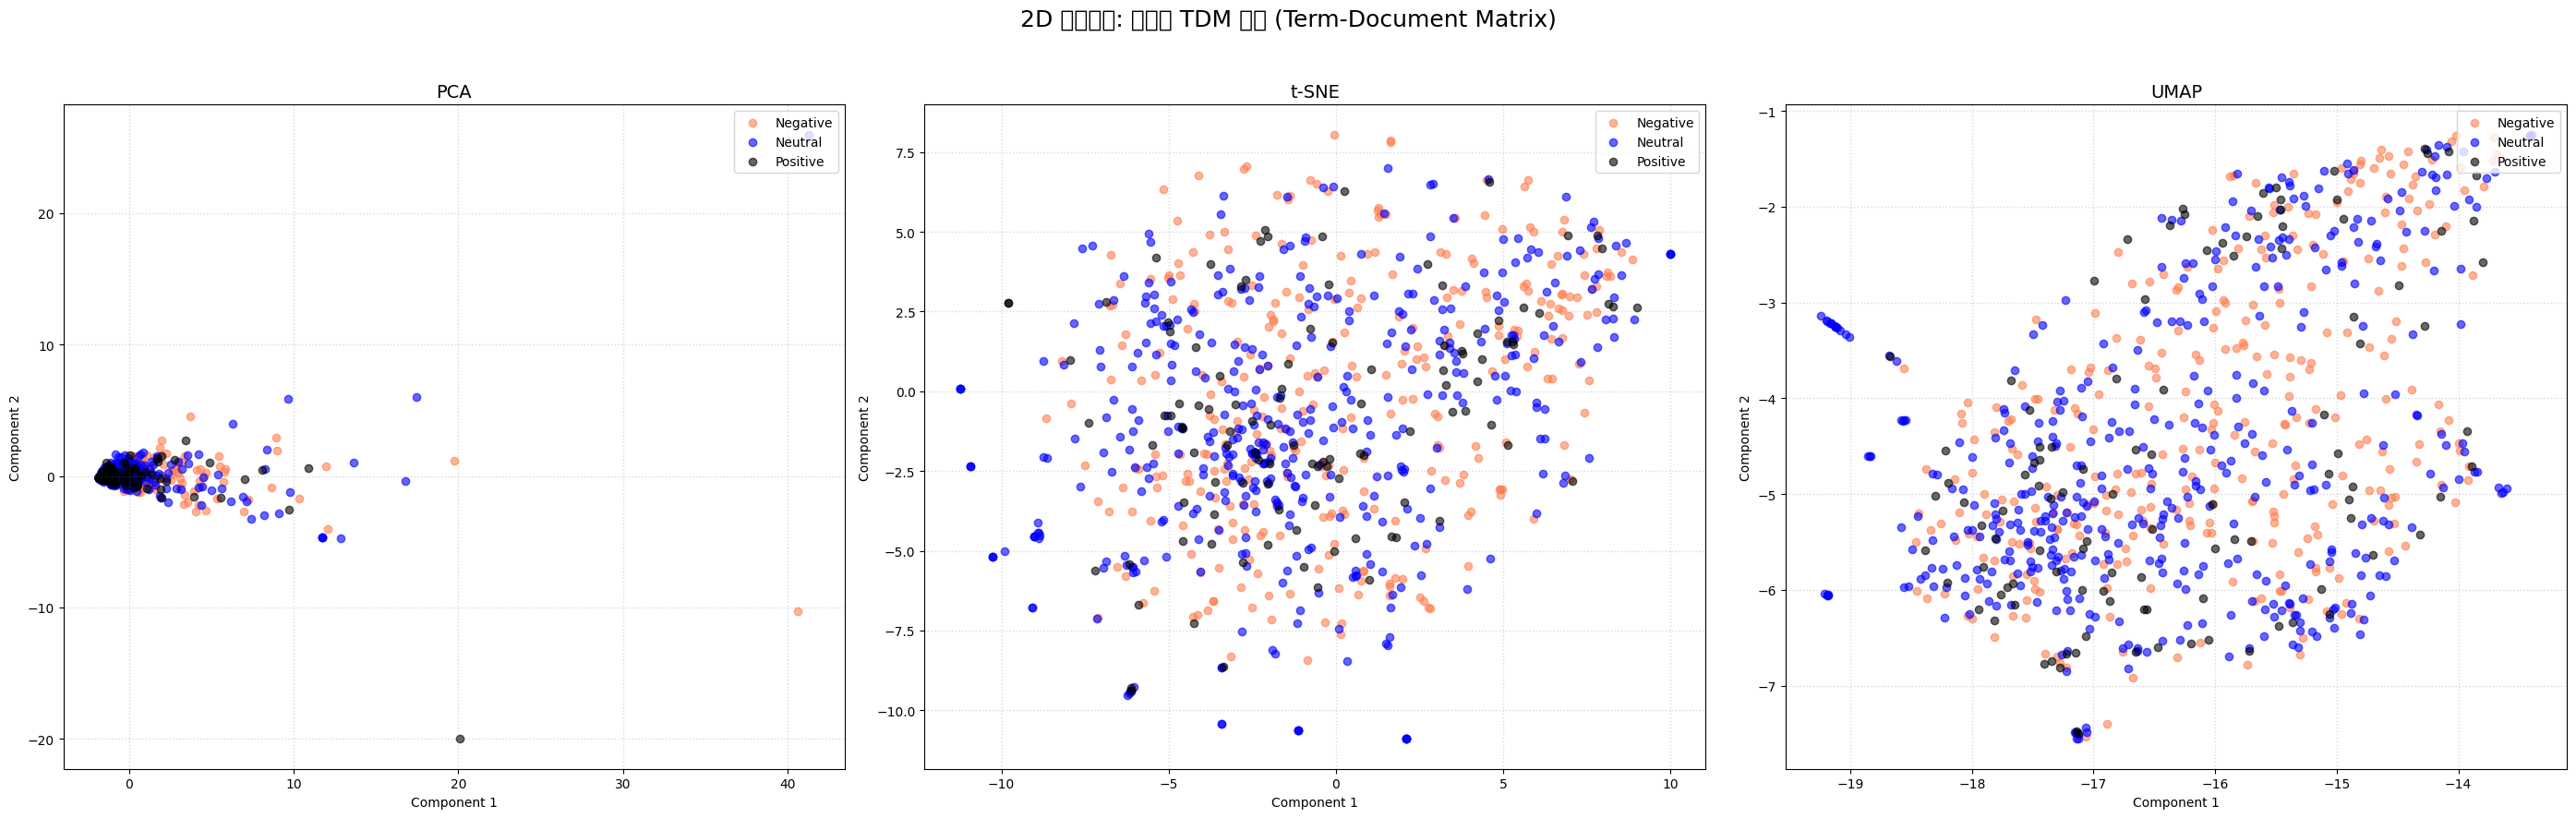

In [62]:
print("\n--- 2D 降維: 僅 TDM 數據 ---")
data_to_use_tdm = tdm_df.values

# 應用 PCA, t-SNE, 和 UMAP
X_pca_tdm = PCA(n_components=2).fit_transform(data_to_use_tdm)
# t-SNE 運行時間較長
print("正在執行 t-SNE...")
X_tsne_tdm = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=1).fit_transform(data_to_use_tdm)
print("t-SNE 完成。正在執行 UMAP...")
X_umap_tdm = umap.UMAP(n_components=2, random_state=42).fit_transform(data_to_use_tdm)
print("UMAP 完成。")

# 繪圖
fig, axes = plt.subplots(1, 3, figsize=(28, 9))
fig.suptitle('2D 降維比較: 僅使用 TDM 數據 (Term-Document Matrix)', fontsize=18)

plot_scatter(axes[0], X_pca_tdm, 'PCA', X_new)
plot_scatter(axes[1], X_tsne_tdm, 't-SNE', X_new)
plot_scatter(axes[2], X_umap_tdm, 'UMAP', X_new)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('tdm_2d_reduction_comparison.png')
# plt.show() # 在 Colab/Jupyter 中請使用 plt.show()
print("結果已保存為 tdm_2d_reduction_comparison.png")


--- 2D 降維: 擴充數據 (TDM + Patterns) ---
正在執行 t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 847 samples in 0.073s...
[t-SNE] Computed neighbors for 847 samples in 0.550s...
[t-SNE] Computed conditional probabilities for sample 847 / 847
[t-SNE] Mean sigma: 0.867049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.580254
[t-SNE] KL divergence after 1000 iterations: 1.973476
t-SNE 完成。正在執行 UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 完成。


/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/tmp/ipython-input-3213758471.py:22: UserWarning: Glyph 29992 (\N{CJK UNIFIED IDEOGRAPH-7528}) missing from font(s) DejaVu Sans.
  plt.tight_layout(re

結果已保存為 augmented_2d_reduction_comparison.png


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36611 (\N{CJK UNIFIED IDEOGRAPH-8F03}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20351 (\N{CJK UNIFIED IDEOGRAPH-4F7F}) missing from font(s) DejaVu Sans.
  fig.canvas

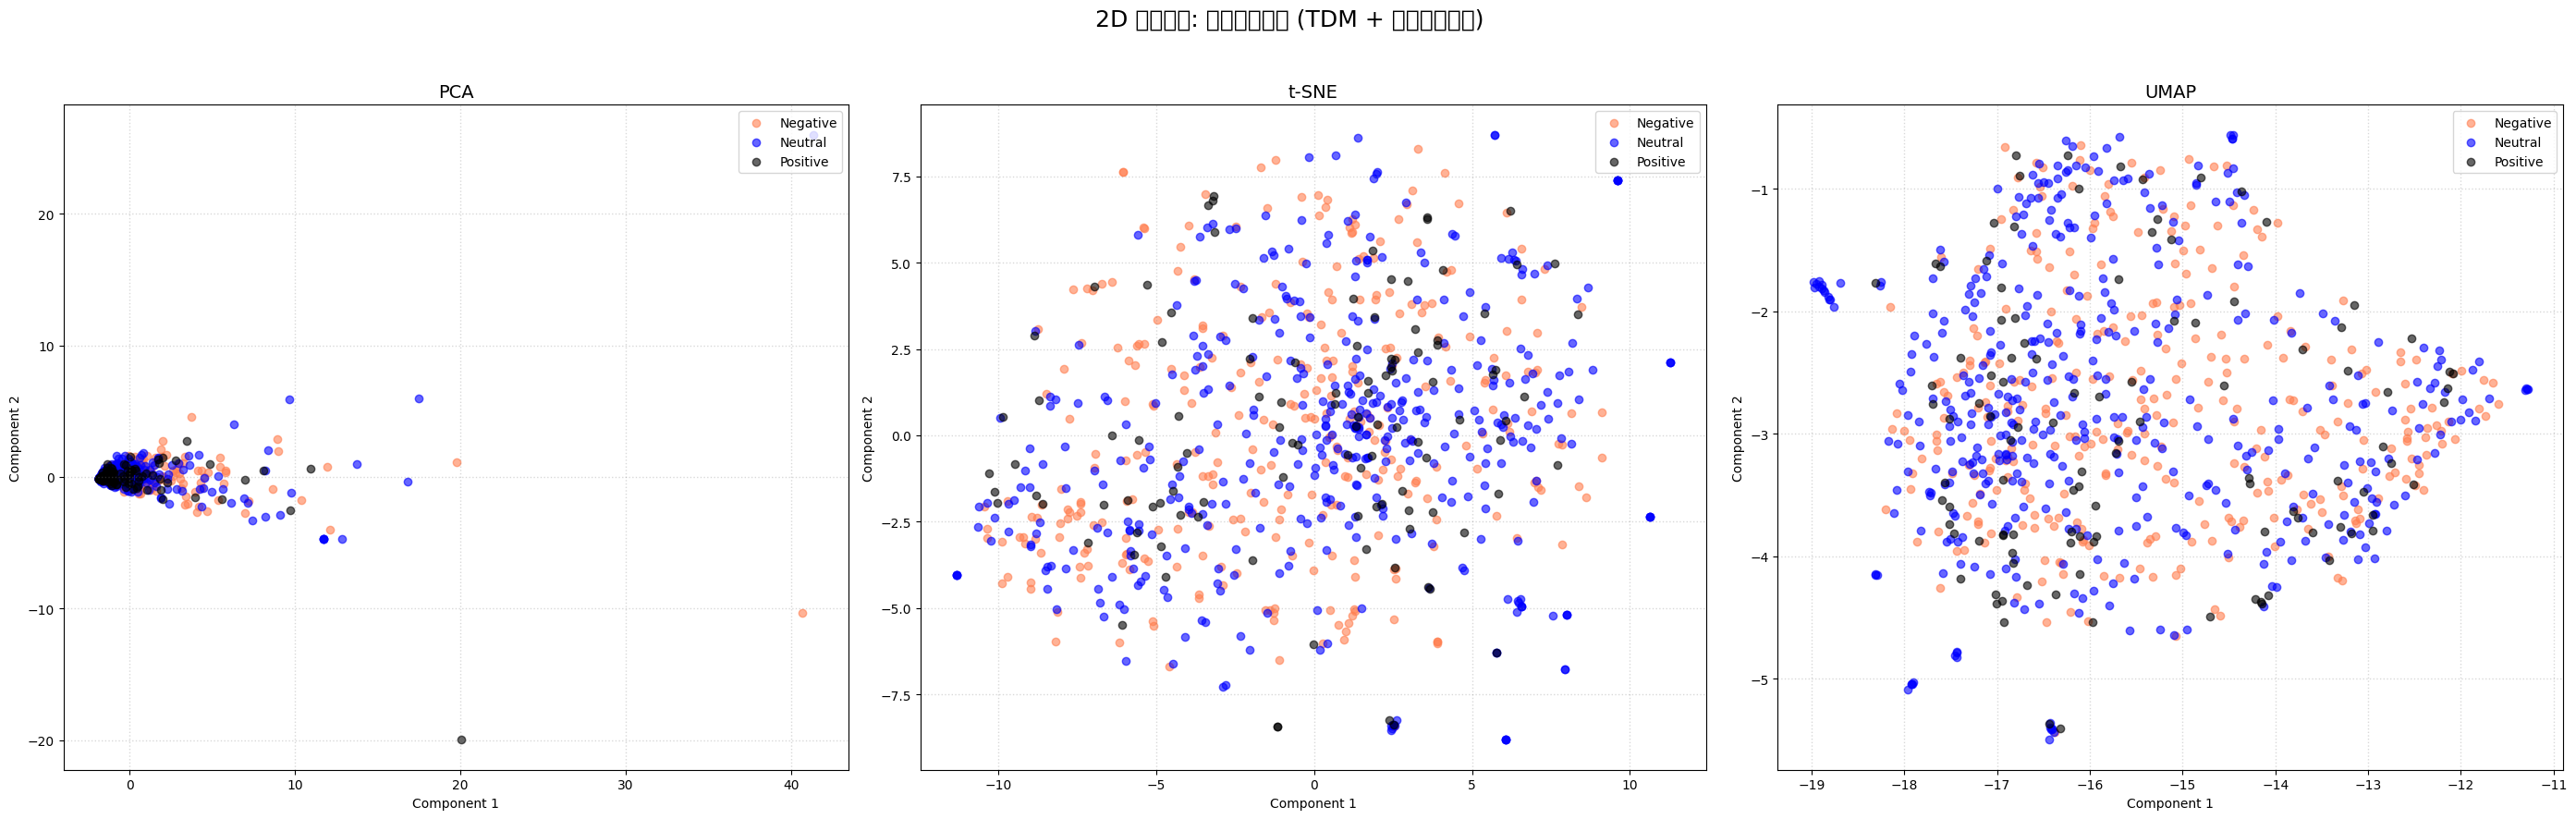

In [63]:
print("\n--- 2D 降維: 擴充數據 (TDM + Patterns) ---")
data_to_use_aug = augmented_df.values

# 應用 PCA, t-SNE, 和 UMAP
X_pca_aug = PCA(n_components=2).fit_transform(data_to_use_aug)
# t-SNE 運行時間較長
print("正在執行 t-SNE...")
X_tsne_aug = TSNE(n_components=2, random_state=42, n_jobs=-1, verbose=1).fit_transform(data_to_use_aug)
print("t-SNE 完成。正在執行 UMAP...")
X_umap_aug = umap.UMAP(n_components=2, random_state=42).fit_transform(data_to_use_aug)
print("UMAP 完成。")


# 繪圖
fig, axes = plt.subplots(1, 3, figsize=(28, 9))
fig.suptitle('2D 降維比較: 使用擴充數據 (TDM + 頻繁模式特徵)', fontsize=18)

plot_scatter(axes[0], X_pca_aug, 'PCA', X_new)
plot_scatter(axes[1], X_tsne_aug, 't-SNE', X_new)
plot_scatter(axes[2], X_umap_aug, 'UMAP', X_new)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('augmented_2d_reduction_comparison.png')
# plt.show()
print("結果已保存為 augmented_2d_reduction_comparison.png")


--- 3D 降維: 擴充數據 (Augmented Data) ---
正在執行 3D t-SNE...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 847 samples in 0.019s...
[t-SNE] Computed neighbors for 847 samples in 0.311s...
[t-SNE] Computed conditional probabilities for sample 847 / 847
[t-SNE] Mean sigma: 0.867049
[t-SNE] KL divergence after 250 iterations with early exaggeration: 97.577553
[t-SNE] KL divergence after 1000 iterations: 2.366644
3D t-SNE 完成。正在執行 3D UMAP...


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


3D UMAP 完成。
3D 視覺化結果已保存。


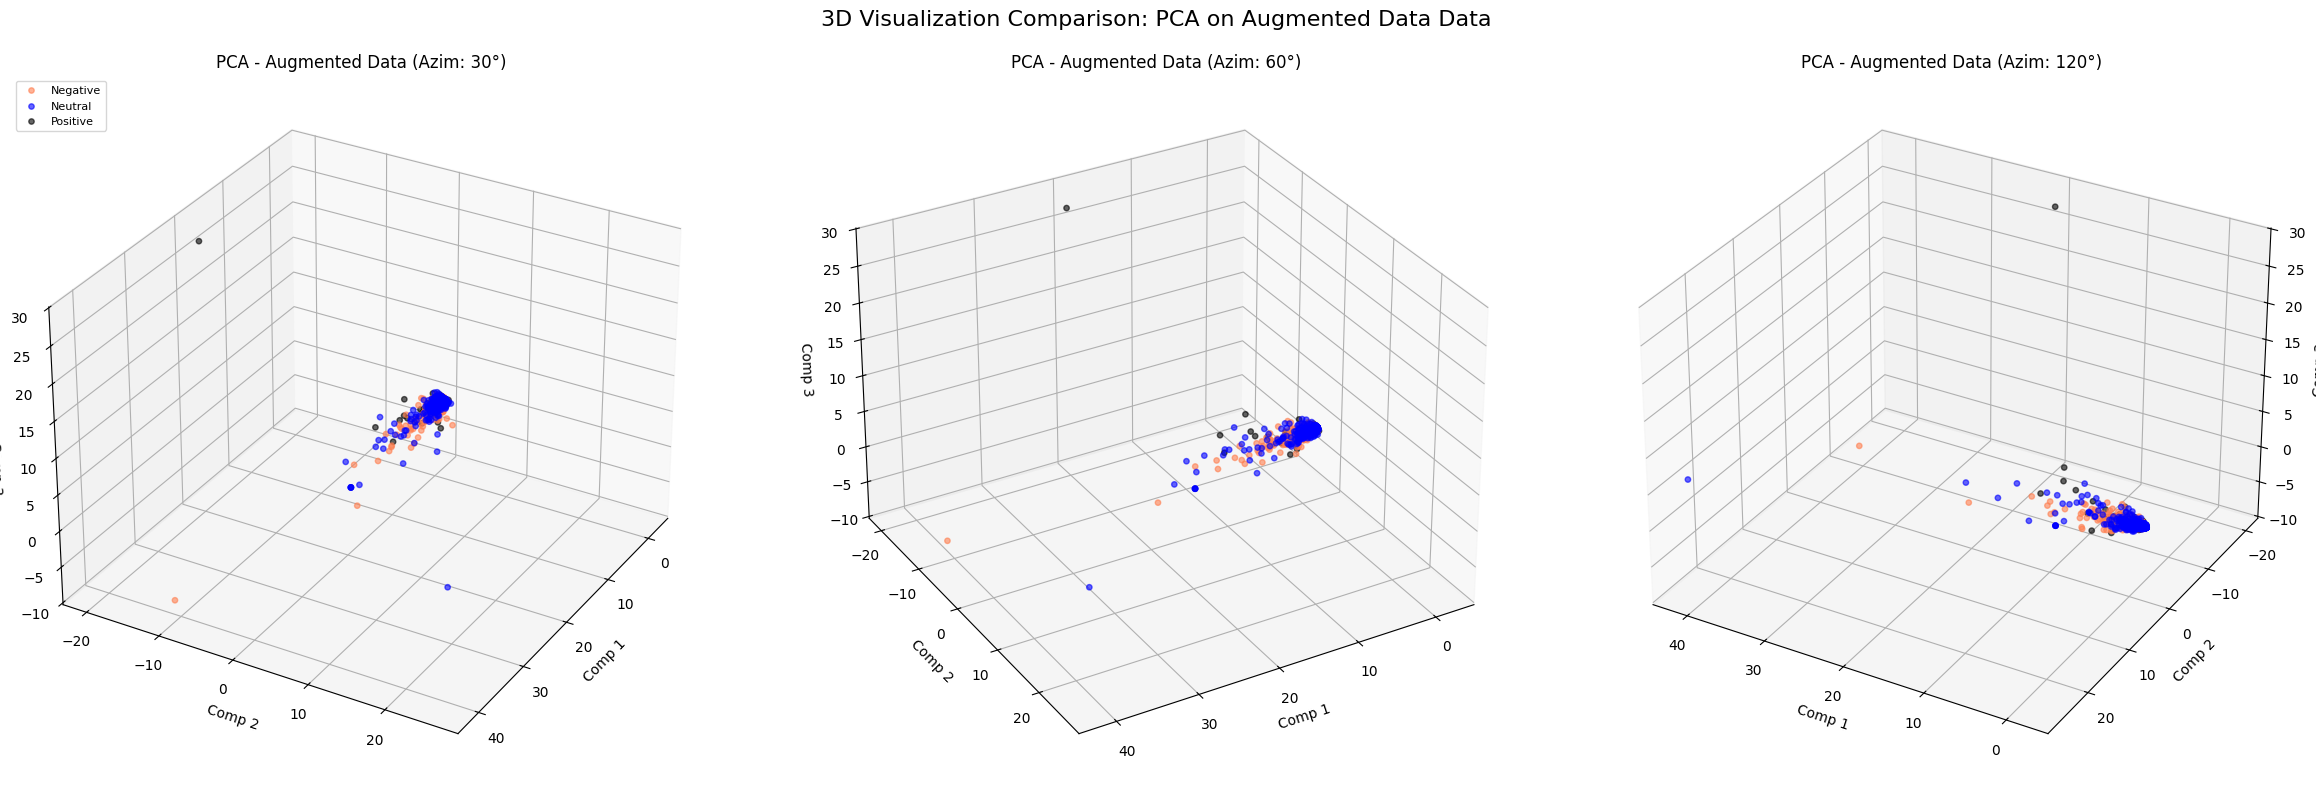

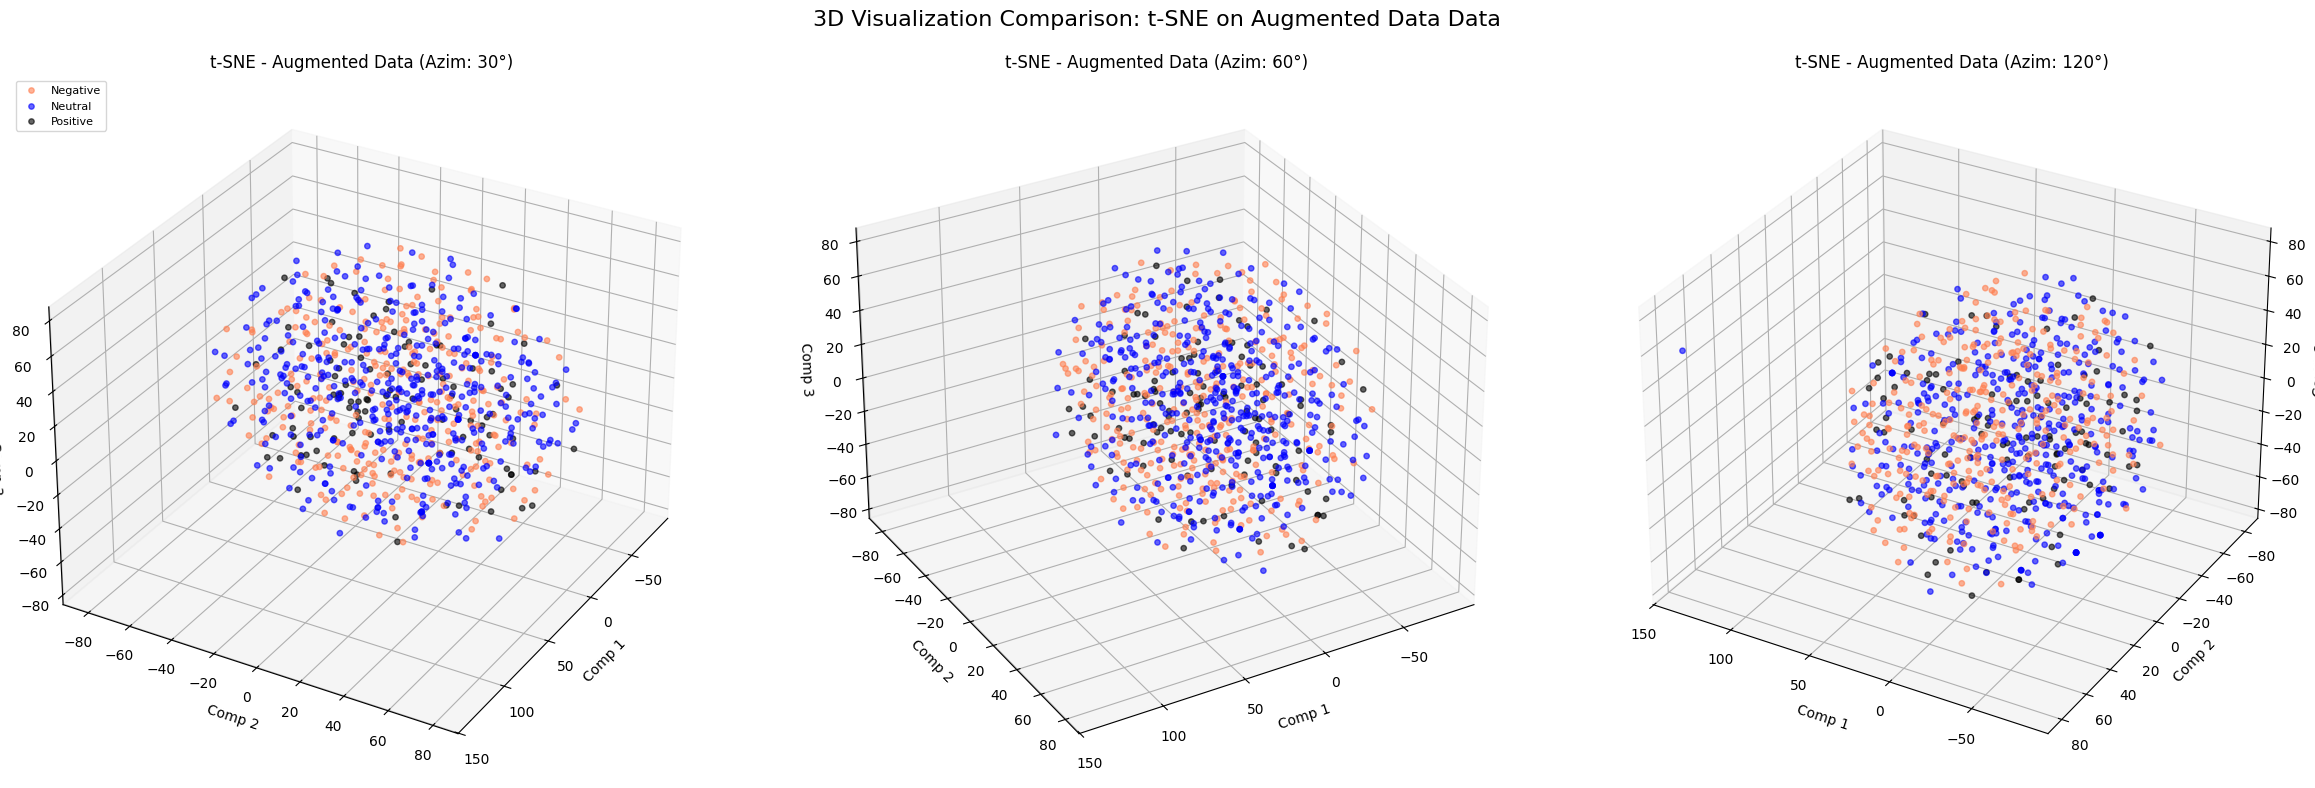

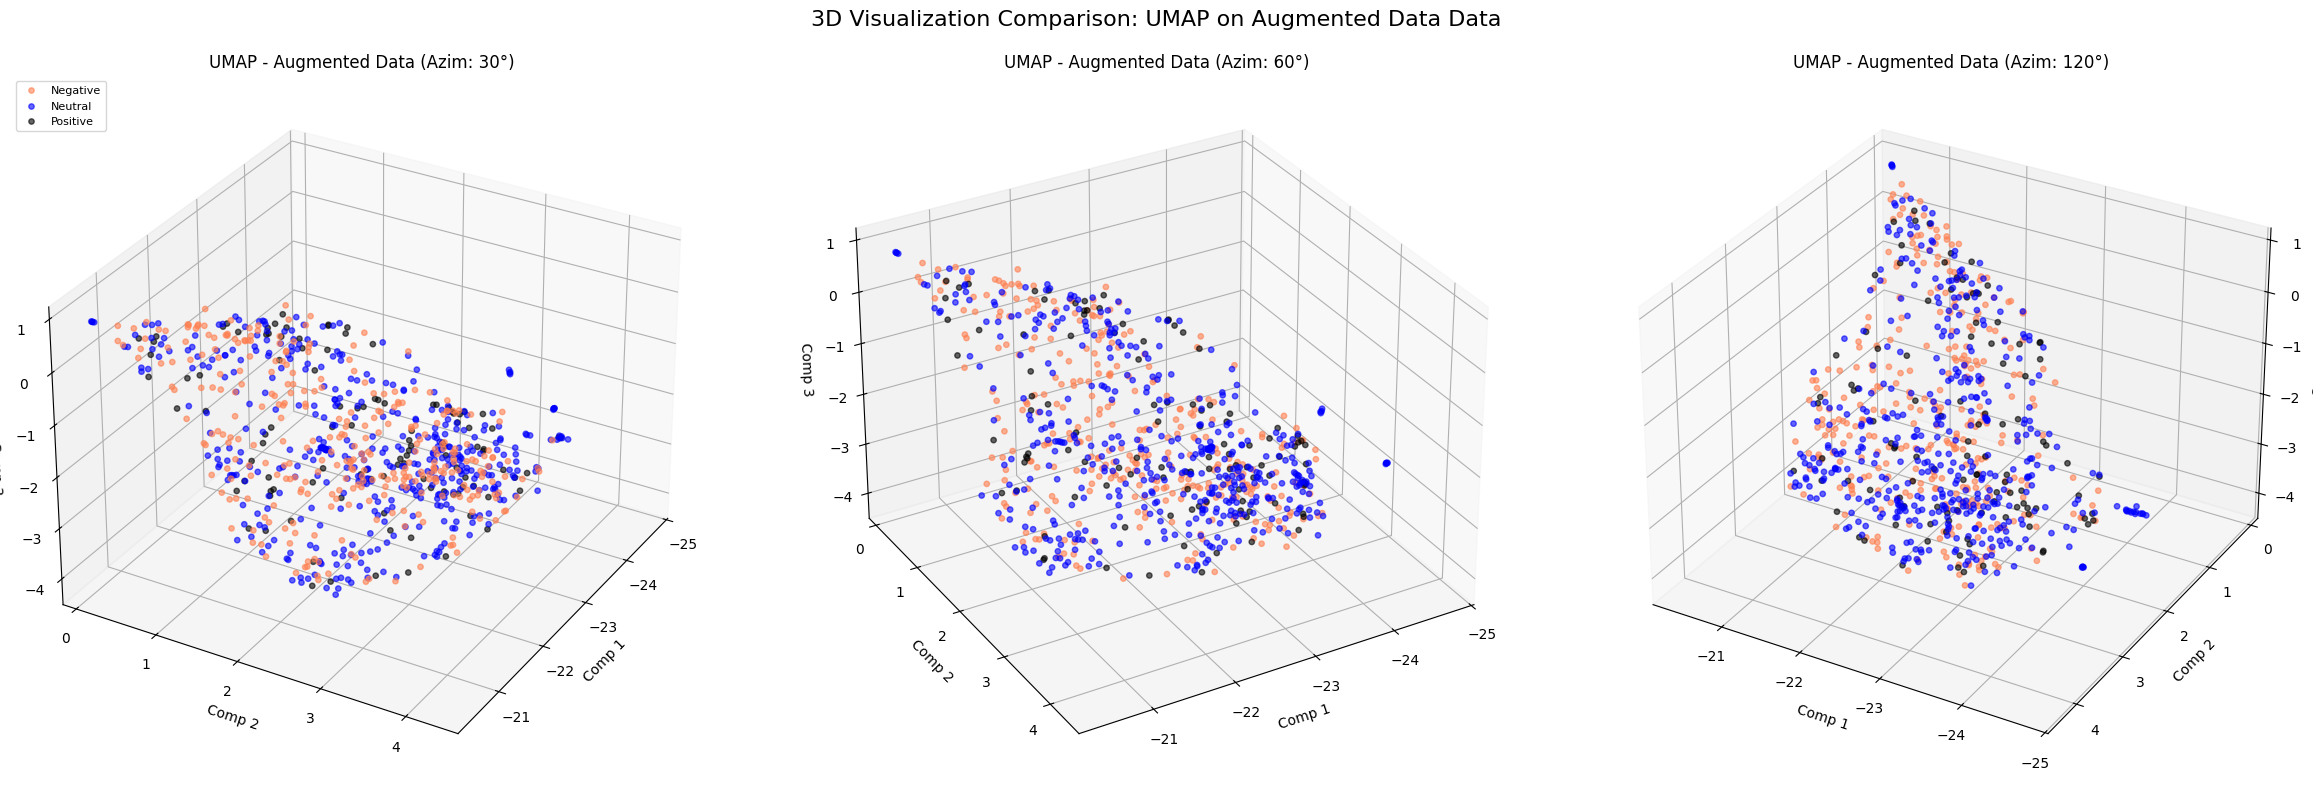

In [64]:
from mpl_toolkits.mplot3d import Axes3D

data_to_use_3d = augmented_df.values
title_prefix = 'Augmented Data'
print(f"\n--- 3D 降維: 擴充數據 ({title_prefix}) ---")

# 執行 3D 降維
X_pca_3d = PCA(n_components=3).fit_transform(data_to_use_3d)
# t-SNE 運行時間較長
print("正在執行 3D t-SNE...")
X_tsne_3d = TSNE(n_components=3, random_state=42, n_jobs=-1, verbose=1).fit_transform(data_to_use_3d)
print("3D t-SNE 完成。正在執行 3D UMAP...")
X_umap_3d = umap.UMAP(n_components=3, random_state=42).fit_transform(data_to_use_3d)
print("3D UMAP 完成。")

# 3D 繪圖參數
angles = [30, 60, 120]

def plot_3d(X_reduced, method_name, data_source_df):
    """
    繪製 3D 散點圖，並在單一 Figure 中顯示三個不同視角。
    """
    fig = plt.figure(figsize=(24, 8))

    for i, azim_angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i + 1, projection='3d')

        for c, category in zip(col, categories):
            # 🌟 關鍵修正：使用 data_source_df 的 index 進行篩選
            mask = (data_source_df['category_name'] == category).values

            xs = X_reduced[mask, 0]
            ys = X_reduced[mask, 1]
            zs = X_reduced[mask, 2]

            ax.scatter(xs, ys, zs, c=c, marker='o', label=category, alpha=0.6, s=15) # 縮小點的大小

        ax.view_init(elev=30, azim=azim_angle)

        ax.set_title(f'{method_name} - {title_prefix} (Azim: {azim_angle}°)', fontsize=12)
        ax.set_xlabel('Comp 1', fontsize=10)
        ax.set_ylabel('Comp 2', fontsize=10)
        ax.set_zlabel('Comp 3', fontsize=10)

        # 僅在第一個圖中顯示圖例
        if i == 0:
            ax.legend(loc='upper left', fontsize=8)

    plt.suptitle(f'3D Visualization Comparison: {method_name} on {title_prefix} Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'{method_name.lower()}_3d_augmented.png')
    # plt.show()

# --- 繪圖 ---
plot_3d(X_pca_3d, 'PCA', X_new)
plot_3d(X_tsne_3d, 't-SNE', X_new)
plot_3d(X_umap_3d, 'UMAP', X_new)
print("3D 視覺化結果已保存。")

In [65]:
from sklearn import preprocessing
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 🌟 變數替換: 將 X 替換為 X_new (您的主數據框)
# ----------------------------------------------------
X_data = X_new

# 1. 創建 LabelBinarizer 實例
mlb = preprocessing.LabelBinarizer()

# 2. 對 category_name 欄位進行擬合 (fit)
print("--- 1. 對 'category_name' 進行擬合 ---")
mlb.fit(X_data['category_name'])

# 3. 執行轉換 (transform)
# 轉換會將每個類別名稱替換為一個二元向量 (e.g., [0, 0, 1, 0])
# 儲存為新的欄位 'bin_category_name'
X_data['bin_category_name'] = mlb.transform(X_data['category_name']).tolist()

# ----------------------------------------------------
# 4. 驗證結果與輸出
# ----------------------------------------------------

print("\n--- 2. 檢查編碼類別順序 ---")
# 獲取 LabelBinarizer 內部確定的類別順序
encoded_classes = mlb.classes_
print(f"LabelBinarizer 編碼順序: {encoded_classes}")

print("\n--- 3. 顯示前 8 筆數據以驗證結果 ---")
# 選擇原始欄位和新的二值化欄位進行顯示
verification_df = X_data[['category_name', 'bin_category_name']].head(8)
print(verification_df.to_markdown(index=False))

# ----------------------------------------------------
# 5. 確保 X_new 更新
# ----------------------------------------------------
# 由於我們使用了 X_data = X_new， X_new 已經被更新。
print(f"\nX_new DataFrame 已成功新增 'bin_category_name' 欄位。")

--- 1. 對 'category_name' 進行擬合 ---

--- 2. 檢查編碼類別順序 ---
LabelBinarizer 編碼順序: ['Negative' 'Neutral' 'Positive']

--- 3. 顯示前 8 筆數據以驗證結果 ---
| category_name   | bin_category_name   |
|:----------------|:--------------------|
| Negative        | [1, 0, 0]           |
| Neutral         | [0, 1, 0]           |
| Neutral         | [0, 1, 0]           |
| Positive        | [0, 0, 1]           |
| Negative        | [1, 0, 0]           |
| Neutral         | [0, 1, 0]           |
| Negative        | [1, 0, 0]           |
| Neutral         | [0, 1, 0]           |

X_new DataFrame 已成功新增 'bin_category_name' 欄位。


In [66]:
import numpy as np
import time
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize
from sklearn.feature_extraction.text import CountVectorizer # 確保 CountVectorizer 可用

X_data = X_new

# 設定種子並隨機選擇 3 個索引
np.random.seed(42)
# 從 X_data 的長度中隨機選擇 3 個不重複的索引
indices = np.random.choice(len(X_data), 3, replace=False)
idx_1, idx_2, idx_3 = indices[0], indices[1], indices[2]

# 取得文本內容 (需要以列表形式傳遞給 transform)
document_to_transform_1 = [X_data.iloc[idx_1]['text']]
document_to_transform_2 = [X_data.iloc[idx_2]['text']]
document_to_transform_3 = [X_data.iloc[idx_3]['text']]

print(f"--- 選擇的隨機文件資訊 ---")
print(f"Text 1 (Index {idx_1}): 類別 {X_data.iloc[idx_1]['category_name']}")
print(f"Text 2 (Index {idx_2}): 類別 {X_data.iloc[idx_2]['category_name']}")
print(f"Text 3 (Index {idx_3}): 類別 {X_data.iloc[idx_3]['category_name']}")
print("------------------------")

# 1. 向量化 (Count Vectorizer)
# count_vect 應在 Phase 1 中已定義
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# 2. 二值化 (Binarize) - 示範從計數向量轉為二元特徵
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


# 3. 輸出向量 (展示原始計數和二值化結果)
print("\n--- 原始計數向量 (Count Vectors) ---")
# 使用 .todense() 轉換為密集矩陣以便於輸出
print(f"Text 1 (Index {idx_1}):\n{document_vector_count_1.todense()}")
print(f"Text 2 (Index {idx_2}):\n{document_vector_count_2.todense()}")
print(f"Text 3 (Index {idx_3}):\n{document_vector_count_3.todense()}")

print("\n--- 二值化向量 (Binary Vectors) ---")
print(f"Text 1 (Index {idx_1}):\n{document_vector_count_1_bin.todense()}")
print(f"Text 2 (Index {idx_2}):\n{document_vector_count_2_bin.todense()}")
print(f"Text 3 (Index {idx_3}):\n{document_vector_count_3_bin.todense()}")

# 4. 計算餘弦相似度
cos_sim_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0][0]
cos_sim_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0][0]
cos_sim_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0][0]

# 5. 輸出餘弦相似度結果
print("\n--- 餘弦相似度結果 (Cosine Similarity) ---")
print(f"Cos Sim (Text 1 vs Text 2): {cos_sim_1_2:.4f}")
print(f"Cos Sim (Text 1 vs Text 3): {cos_sim_1_3:.4f}")
print(f"Cos Sim (Text 2 vs Text 3): {cos_sim_2_3:.4f}")

--- 選擇的隨機文件資訊 ---
Text 1 (Index 457): 類別 Neutral
Text 2 (Index 342): 類別 Neutral
Text 3 (Index 280): 類別 Negative
------------------------

--- 原始計數向量 (Count Vectors) ---
Text 1 (Index 457):
[[0 0 0 ... 0 0 0]]
Text 2 (Index 342):
[[0 0 0 ... 0 0 0]]
Text 3 (Index 280):
[[0 0 0 ... 0 0 0]]

--- 二值化向量 (Binary Vectors) ---
Text 1 (Index 457):
[[0 0 0 ... 0 0 0]]
Text 2 (Index 342):
[[0 0 0 ... 0 0 0]]
Text 3 (Index 280):
[[0 0 0 ... 0 0 0]]

--- 餘弦相似度結果 (Cosine Similarity) ---
Cos Sim (Text 1 vs Text 2): 0.0000
Cos Sim (Text 1 vs Text 3): 0.0000
Cos Sim (Text 2 vs Text 3): 0.0000


In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


# 建立類別標籤的映射和排序
category_mapping = dict(X_data[['category', 'category_name']].drop_duplicates().values)
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# 目標變數 (y)
y = X_data['category']

# ----------------------------------------------------
# 1. 使用 TDM 數據 (tdm_df) 進行訓練
# ----------------------------------------------------
print("="*60)
print("## 1. 基準模型訓練與評估 (僅使用 TDM)")
print("="*60)

X_train_tdm, X_test_tdm, y_train, y_test = train_test_split(
    tdm_df.values,  # 純 TDM 特徵
    y,
    test_size=0.3,
    random_state=42
)
print(f"訓練特徵集大小 (TDM): {X_train_tdm.shape}")


# --- 樸素貝葉斯 (MultinomialNB) ---
print("\n--- A. 樸素貝葉斯 (MultinomialNB) ---")
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tdm, y_train)
y_pred_nb_tdm = nb_classifier.predict(X_test_tdm)

print("總體準確率 (Accuracy):", accuracy_score(y_test, y_pred_nb_tdm))
print("\n詳細分類報告 (Classification Report):\n",
      classification_report(y_test, y_pred_nb_tdm, target_names=target_names, digits=4))


# --- 決策樹 (DecisionTreeClassifier) ---
print("\n--- B. 決策樹 (DecisionTreeClassifier) ---")
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tdm, y_train)
y_pred_dt_tdm = dt_classifier.predict(X_test_tdm)

print("總體準確率 (Accuracy):", accuracy_score(y_test, y_pred_dt_tdm))
print("\n詳細分類報告 (Classification Report):\n",
      classification_report(y_test, y_pred_dt_tdm, target_names=target_names, digits=4))


# ----------------------------------------------------
# 2. 使用擴充數據 (augmented_df) 進行訓練
# ----------------------------------------------------
print("\n\n"+"="*60)
print("## 2. 擴充模型訓練與評估 (TDM + 頻繁模式特徵)")
print("="*60)

# 使用 augmented_df 劃分數據
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_df.values,  # 擴充特徵
    y,
    test_size=0.3,
    random_state=42
)
print(f"訓練特徵集大小 (Augmented): {X_train_aug.shape}")


# --- 樸素貝葉斯 (MultinomialNB) ---
print("\n--- A. 樸素貝葉斯 (MultinomialNB) ---")
nb_classifier_aug = MultinomialNB()
nb_classifier_aug.fit(X_train_aug, y_train_aug)
y_pred_nb_aug = nb_classifier_aug.predict(X_test_aug)

print("總體準確率 (Accuracy):", accuracy_score(y_test_aug, y_pred_nb_aug))
print("\n詳細分類報告 (Classification Report):\n",
      classification_report(y_test_aug, y_pred_nb_aug, target_names=target_names, digits=4))


# --- 決策樹 (DecisionTreeClassifier) ---
print("\n--- B. 決策樹 (DecisionTreeClassifier) ---")
dt_classifier_aug = DecisionTreeClassifier(random_state=42)
dt_classifier_aug.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_classifier_aug.predict(X_test_aug)

print("總體準確率 (Accuracy):", accuracy_score(y_test_aug, y_pred_dt_aug))
print("\n詳細分類報告 (Classification Report):\n",
      classification_report(y_test_aug, y_pred_dt_aug, target_names=target_names, digits=4))

## 1. 基準模型訓練與評估 (僅使用 TDM)
訓練特徵集大小 (TDM): (592, 4346)

--- A. 樸素貝葉斯 (MultinomialNB) ---
總體準確率 (Accuracy): 0.592156862745098

詳細分類報告 (Classification Report):
               precision    recall  f1-score   support

    Negative     0.5854    0.7347    0.6516        98
     Neutral     0.6393    0.6446    0.6420       121
    Positive     0.1000    0.0278    0.0435        36

    accuracy                         0.5922       255
   macro avg     0.4416    0.4690    0.4457       255
weighted avg     0.5425    0.5922    0.5612       255


--- B. 決策樹 (DecisionTreeClassifier) ---
總體準確率 (Accuracy): 0.49019607843137253

詳細分類報告 (Classification Report):
               precision    recall  f1-score   support

    Negative     0.4878    0.4082    0.4444        98
     Neutral     0.5294    0.6694    0.5912       121
    Positive     0.2000    0.1111    0.1429        36

    accuracy                         0.4902       255
   macro avg     0.4057    0.3962    0.3928       255
weighted avg     0.4669